In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
# loading data
iris = load_iris()
data = np.hstack((iris.data, np.array(iris.target).reshape((-1, 1))))
np.random.shuffle(data)
df = pd.DataFrame(data, columns = (iris.feature_names + ['class']))
df.head(n = 10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,4.4,2.9,1.4,0.2,0.0
1,4.6,3.2,1.4,0.2,0.0
2,5.9,3.0,5.1,1.8,2.0
3,6.8,3.0,5.5,2.1,2.0
4,6.3,2.5,4.9,1.5,1.0
5,6.7,3.3,5.7,2.5,2.0
6,7.2,3.0,5.8,1.6,2.0
7,7.7,2.8,6.7,2.0,2.0
8,4.4,3.2,1.3,0.2,0.0
9,5.8,2.8,5.1,2.4,2.0


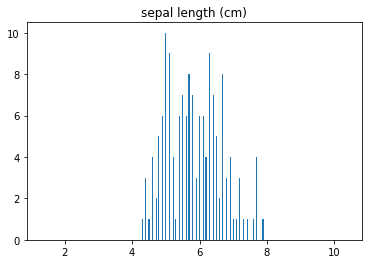

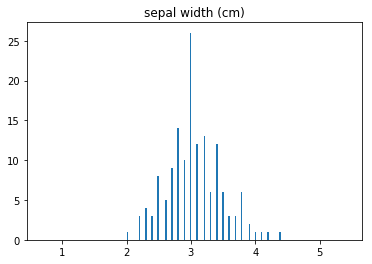

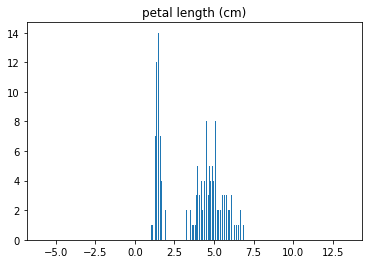

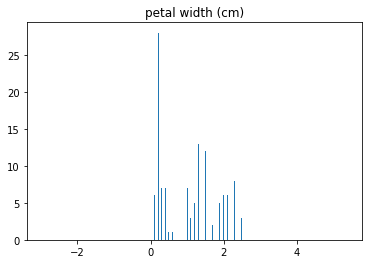

In [3]:
# visualising distribution of attributes
for i in range(df.columns.shape[0] - 1):
    plt.hist(df[df.columns[i]], bins = 100)
    plt.xlim((df[df.columns[i]].mean() - 6*df[df.columns[i]].std(), df[df.columns[i]].mean() + 6*df[df.columns[i]].std()))
    plt.title(df.columns[i])
    plt.show()

In [4]:
# train-test-split
split_factor = 0.85
split = int(split_factor*df.shape[0])
df_train = df[:split]
df_test = df[split:]
df_test.index = range(df_test.shape[0])

In [5]:
# calculating probabilities and likelihoods
prior_prob = {}
mean = {}
std = {}

def set_constants(df):
    for label in np.unique(df[df.columns[-1]]):
        prob = df[df[df.columns[-1]] == label].shape[0] / df.shape[0]
        prior_prob[label] = prob

    for attribute in df.columns:
        mean[attribute] = np.array(df[attribute]).mean()
        std[attribute] = np.array(df[attribute]).std()
    
def probability(attribute, x):
    mu = attribute.mean()
    sigma = attribute.std()
    prob = np.exp((-1.0*(x - mu)**2) / (2.0*sigma*sigma)) / (sigma*np.sqrt(2.0*np.pi))
    return prob

def likelihood(df, X, label):
    l = 1.0
    for ix in range(X.shape[0]):
        cond_prob = probability(np.array(df[df[df.columns[-1]] == label][df.columns[ix]]), X[ix])
        l *= cond_prob
    return l

def posterior_likelihood(df, X, label):
    post_prob = prior_prob[label]*likelihood(df, X, label)
    return post_prob

In [6]:
# prediction function - naive bayes algorithm
def predict(df, X):
    l = []
    labels = np.unique(df[df.columns[-1]])
    for label in labels:
        l.append(posterior_likelihood(df, X, label))
    pred = labels[np.array(l).argmax()]
    return pred

In [7]:
# predicting labels for testing data
set_constants(df_train)
predictions = []
for ix in range(df_test.shape[0]):
    X = df_test.loc[ix, df_test.columns[0]:df_test.columns[-2]]
    pred = predict(df_train, X)
    predictions.append(pred)

In [8]:
# accuracy score
def accuracy(predictions, true_labels):
    print("Pedictions:  ", predictions)
    print("True Labels: ", true_labels)
    accuracy = np.sum(predictions == true_labels) / predictions.shape[0]
    return accuracy
accuracy_score = accuracy(np.array(predictions), np.array(df_test[df_test.columns[-1]]))
print('Accuracy Score = ', accuracy_score)

Pedictions:   [1. 1. 0. 0. 1. 0. 2. 2. 1. 0. 2. 1. 0. 0. 0. 2. 0. 0. 0. 1. 0. 1. 1.]
True Labels:  [1. 1. 0. 0. 1. 0. 2. 2. 1. 0. 2. 1. 0. 0. 0. 2. 0. 0. 0. 1. 0. 1. 1.]
Accuracy Score =  1.0
